# Digit recognition using a Convolutional Neural-Network (cnn) approach

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import operator

import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

(300, 300)

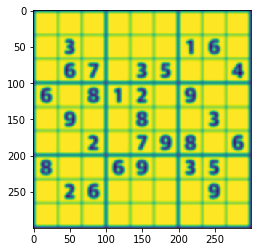

In [2]:
img = cv2.imread('Resources/first.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.GaussianBlur(img, (9, 9), 0)
#img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(img)
img.shape

In [3]:
top_left, top_right, bottom_right, bottom_left = [0,0], [img.shape[0]-1,0], [img.shape[0]-1,img.shape[1]-1], [0,img.shape[1]-1]

In [4]:
src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')
src

array([[  0.,   0.],
       [299.,   0.],
       [299., 299.],
       [  0., 299.]], dtype=float32)

In [5]:
def distance_between(p1, p2):
    """Returns the scalar distance between two points"""
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))

In [6]:
side = max([
    distance_between(bottom_right, top_right),
    distance_between(top_left, bottom_left),
    distance_between(bottom_right, bottom_left),
    distance_between(top_left, top_right)
])

In [7]:
squares = []
side = img.shape[:1]
side = side[0] / 9


In [8]:
for j in range(9):
        for i in range(9):
            squares.append(img[i*int(side)+5:(i+1)*int(side), j*int(side)+5:(j+1)*int(side)])


## CNN mnist method:
The model has been trained on the Google colab notebook and then loaded here.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('cnn.h5')

Using TensorFlow backend.


In [10]:
num = 0.5 - squares[3]/255.

In [11]:
num.sum()

-225.13333333333335

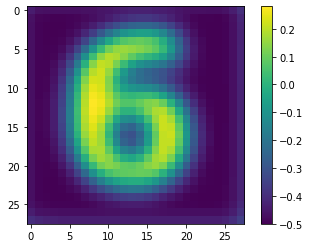

In [12]:
plt.imshow(num)
plt.colorbar()

In [13]:
num0 = np.expand_dims(np.expand_dims(num, axis=0), axis=3)

In [14]:
num0.shape

(1, 28, 28, 1)

In [15]:
model.predict_classes(num0)

array([5], dtype=int64)

In [16]:
np.argmax(model.predict(num0))

5